In [2]:
!pip install scikit-learn-extra -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.3 MB/s eta 0:00:0000:0100:01


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS, BisectingKMeans
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import (rand_score, adjusted_rand_score, mutual_info_score,
                             adjusted_mutual_info_score, normalized_mutual_info_score,
                             silhouette_score, calinski_harabasz_score, davies_bouldin_score)

In [36]:
results = {}

In [4]:
def get_centroids(X, labels):
    centroids = []
    for i in np.unique(labels):
      if i != -1: 
        centroids.append(np.mean(X[labels == i], axis=0))
    return np.array(centroids)
    
def calculate_sse(X, labels, centroids):
    sse = 0
    for i, center in enumerate(centroids):
        cluster_points = X[labels == i]
        sse += np.sum((cluster_points - center) ** 2)
    return sse

def calculate_ssb(X, labels, centroids):
    data_centroid = np.mean(X, axis=0)
    ssb = 0
    for i, center in enumerate(centroids):
        n_points = np.sum(labels == i)
        ssb += n_points * np.sum((center - data_centroid) ** 2)
    return ssb

**IRIS DATASET**

In [38]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

X = df.drop(['species'], axis=1)
y = df['species']

In [39]:
X_scaled = StandardScaler().fit_transform(X)
n_clusters = len(np.unique(y))

K-Means

In [7]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [8]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

--- KMeans Evaluation Metrics ---
                             Metric      Value
        Sum of Squared Errors (SSE) 139.820496
       Sum of Squares Between (SSB) 460.179504
          Adjusted Rand Index (ARI)   0.620135
  Adjusted Mutual Information (AMI)   0.655223
Normalized Mutual Information (NMI)   0.659487
                   Silhouette Score   0.459948
            Calinski-Harabasz Score 241.904402
               Davies-Bouldin Score   0.833595




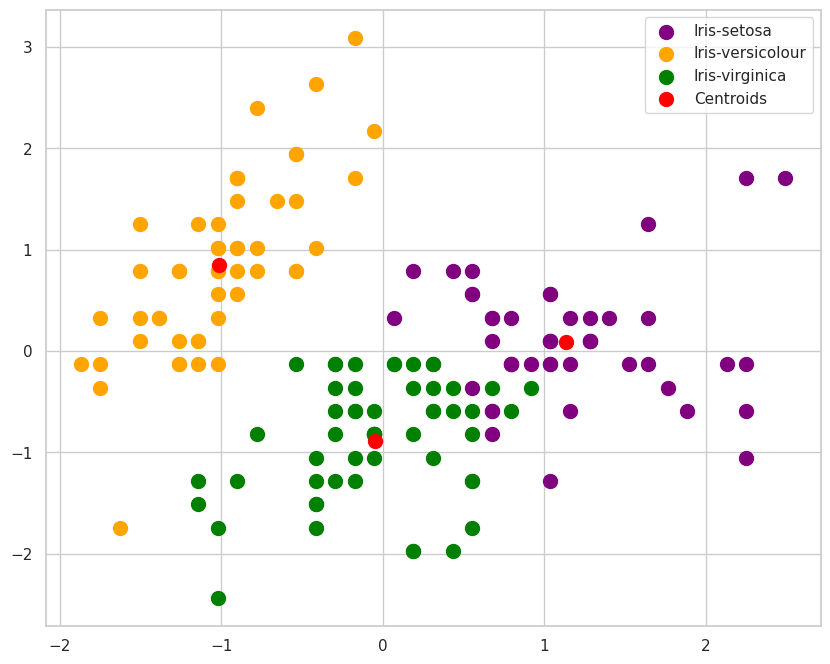

In [9]:
metrics_data = {
    'Metric': [
        'Sum of Squared Errors (SSE)',
        'Sum of Squares Between (SSB)',
        'Adjusted Rand Index (ARI)',
        'Adjusted Mutual Information (AMI)',
        'Normalized Mutual Information (NMI)',
        'Silhouette Score',
        'Calinski-Harabasz Score',
        'Davies-Bouldin Score'
    ],
    'Value': [
        calculate_sse(X_scaled, labels, centroids),
        calculate_ssb(X_scaled, labels, centroids),
        adjusted_rand_score(y, labels),
        adjusted_mutual_info_score(y, labels),
        normalized_mutual_info_score(y, labels),
        silhouette_score(X_scaled, labels),
        calinski_harabasz_score(X_scaled, labels),
        davies_bouldin_score(X_scaled, labels)
    ]
}

df_metrics = pd.DataFrame(metrics_data)

results['KMeans'] = df_metrics

print("--- KMeans Evaluation Metrics ---")
print(df_metrics.to_string(index=False))
print("\n")

plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

# Cluster points
plt.scatter(X_scaled[labels == 0, 0], X_scaled[labels == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X_scaled[labels == 1, 0], X_scaled[labels == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X_scaled[labels == 2, 0], X_scaled[labels == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')


# Centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

K-Medoids

In [10]:
kmedoid = KMedoids(n_clusters=n_clusters, random_state=42)
kmedoid.fit(X_scaled)

KMedoids(n_clusters=3, random_state=42)

In [11]:
centroids = kmedoid.cluster_centers_
labels = kmedoid.labels_

--- KMedoids Evaluation Metrics ---
                             Metric      Value
        Sum of Squared Errors (SSE) 148.610356
       Sum of Squares Between (SSB) 457.198161
          Adjusted Rand Index (ARI)   0.631158
  Adjusted Mutual Information (AMI)   0.664557
Normalized Mutual Information (NMI)   0.668714
                   Silhouette Score   0.459042
            Calinski-Harabasz Score 239.748268
               Davies-Bouldin Score   0.838455




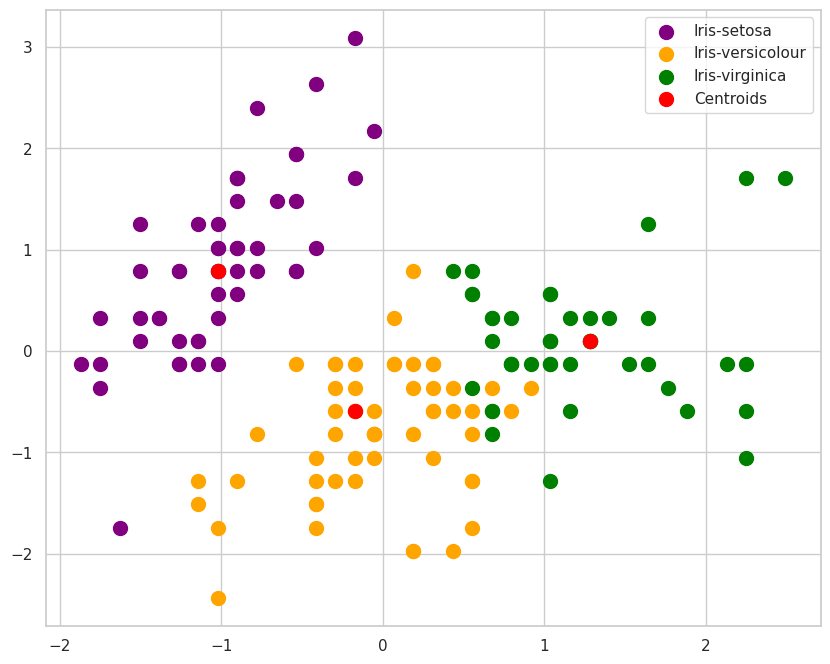

In [12]:
metrics_data = {
    'Metric': [
        'Sum of Squared Errors (SSE)',
        'Sum of Squares Between (SSB)',
        'Adjusted Rand Index (ARI)',
        'Adjusted Mutual Information (AMI)',
        'Normalized Mutual Information (NMI)',
        'Silhouette Score',
        'Calinski-Harabasz Score',
        'Davies-Bouldin Score'
    ],
    'Value': [
        calculate_sse(X_scaled, labels, centroids),
        calculate_ssb(X_scaled, labels, centroids),
        adjusted_rand_score(y, labels),
        adjusted_mutual_info_score(y, labels),
        normalized_mutual_info_score(y, labels),
        silhouette_score(X_scaled, labels),
        calinski_harabasz_score(X_scaled, labels),
        davies_bouldin_score(X_scaled, labels)
    ]
}

df_metrics = pd.DataFrame(metrics_data)

results['KMedoids'] = df_metrics

print("--- KMedoids Evaluation Metrics ---")
print(df_metrics.to_string(index=False))
print("\n")

plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

# Cluster points
plt.scatter(X_scaled[labels == 0, 0], X_scaled[labels == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X_scaled[labels == 1, 0], X_scaled[labels == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X_scaled[labels == 2, 0], X_scaled[labels == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')


# Centroids of the clusters
plt.scatter(centroids[:, 0], centroids[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

Dendogram

In [13]:
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg_cluster.fit_predict(X_scaled)

--- Dendogram Evaluation Metrics ---
                             Metric       Value
        Sum of Squared Errors (SSE) 1697.304675
       Sum of Squares Between (SSB)  504.127365
          Adjusted Rand Index (ARI)    0.615323
  Adjusted Mutual Information (AMI)    0.671286
Normalized Mutual Information (NMI)    0.675470
                   Silhouette Score    0.446689
            Calinski-Harabasz Score  222.719164
               Davies-Bouldin Score    0.803467




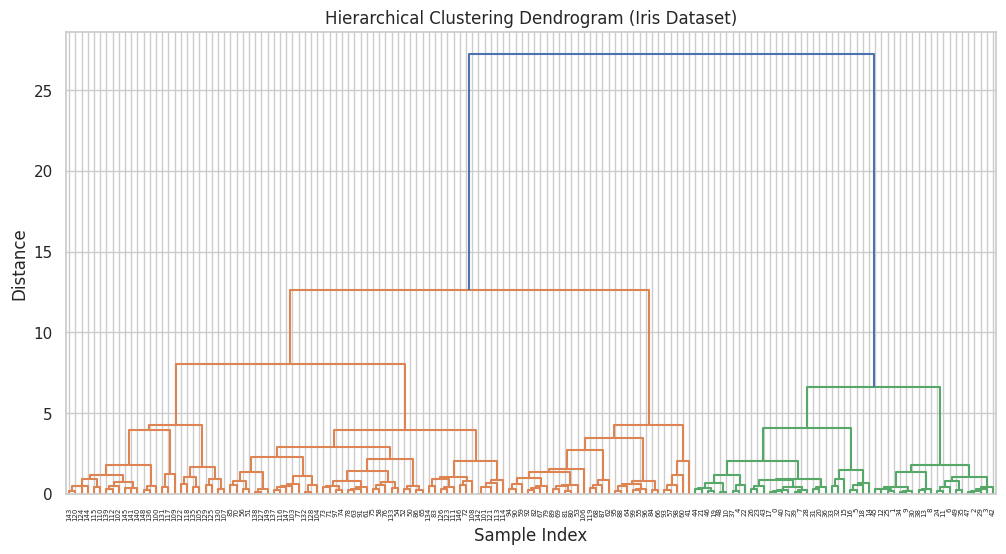

In [14]:
metrics_data = {
    'Metric': [
        'Sum of Squared Errors (SSE)',
        'Sum of Squares Between (SSB)',
        'Adjusted Rand Index (ARI)',
        'Adjusted Mutual Information (AMI)',
        'Normalized Mutual Information (NMI)',
        'Silhouette Score',
        'Calinski-Harabasz Score',
        'Davies-Bouldin Score'
    ],
    'Value': [
        calculate_sse(X_scaled, agg_labels, centroids),
        calculate_ssb(X_scaled, agg_labels, centroids),
        adjusted_rand_score(y, agg_labels),
        adjusted_mutual_info_score(y, agg_labels),
        normalized_mutual_info_score(y, agg_labels),
        silhouette_score(X_scaled, agg_labels),
        calinski_harabasz_score(X_scaled, agg_labels),
        davies_bouldin_score(X_scaled, agg_labels)
    ]
}

df_metrics = pd.DataFrame(metrics_data)

results['Dendogram'] = df_metrics

print("--- Dendogram Evaluation Metrics ---")
print(df_metrics.to_string(index=False))
print("\n")

plt.figure(figsize=(12, 6))
linked = linkage(X_scaled, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title(f'Hierarchical Clustering Dendrogram (Iris Dataset)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Density-based algorithms

In [43]:
density_params = {
        "DBSCAN": {'eps': 0.8 , 'min_samples': 5},
        "OPTICS": {'min_samples': 5}
    }

density_algs = {
    "DBSCAN": DBSCAN(**density_params["DBSCAN"]),
    "OPTICS": OPTICS(**density_params["OPTICS"])
}

metrics_list = [
    'Sum of Squared Errors (SSE)',
    'Sum of Squares Between (SSB)',
    'Adjusted Rand Index (ARI)',
    'Adjusted Mutual Information (AMI)',
    'Normalized Mutual Information (NMI)',
    'Silhouette Score',
    'Calinski-Harabasz Score',
    'Davies-Bouldin Score'
]


for name, alg in density_algs.items():
    print(f"--- Running {name} ---")
    labels = alg.fit_predict(X_scaled)
    unique_labels = set(labels)
    n_clusters_found = len(unique_labels) - (1 if -1 in unique_labels else 0)
    print(f"Found {n_clusters_found} clusters (excluding noise).")

    if n_clusters_found < 2:
        print(f"Skipping metrics calculation for {name} as less than 2 clusters were found.")
        na_values = ['N/A'] * len(metrics_list)
        df_metrics = pd.DataFrame({'Metric': metrics_list, 'Value': na_values})
        results[f'{name}'] = df_metrics 
        print(df_metrics.to_string(index=False))
        continue

    centroids = get_centroids(X_scaled, labels) 
    metrics_data = {
        'Metric': metrics_list,
        'Value': [
            calculate_sse(X_scaled, labels, centroids),
            calculate_ssb(X_scaled, labels, centroids),
            adjusted_rand_score(y, labels),
            adjusted_mutual_info_score(y, labels),
            normalized_mutual_info_score(y, labels),
            silhouette_score(X_scaled, labels),
            calinski_harabasz_score(X_scaled, labels),
            davies_bouldin_score(X_scaled, labels)
        ]
    }

    df_metrics = pd.DataFrame(metrics_data)

    results[f'{name}'] = df_metrics 

    print(f"--- {name} Evaluation Metrics ---")
    print(df_metrics.to_string(index=False))
    print("\n")

--- Running DBSCAN ---
Found 2 clusters (excluding noise).
--- DBSCAN Evaluation Metrics ---
                             Metric      Value
        Sum of Squared Errors (SSE) 190.101197
       Sum of Squares Between (SSB) 366.877525
          Adjusted Rand Index (ARI)   0.551755
  Adjusted Mutual Information (AMI)   0.684771
Normalized Mutual Information (NMI)   0.689979
                   Silhouette Score   0.521697
            Calinski-Harabasz Score 126.221166
               Davies-Bouldin Score   1.943201


--- Running OPTICS ---
Found 5 clusters (excluding noise).
--- OPTICS Evaluation Metrics ---
                             Metric      Value
        Sum of Squared Errors (SSE)   3.788517
       Sum of Squares Between (SSB) 129.762736
          Adjusted Rand Index (ARI)   0.051416
  Adjusted Mutual Information (AMI)   0.265690
Normalized Mutual Information (NMI)   0.292357
                   Silhouette Score  -0.300865
            Calinski-Harabasz Score   8.328211
             

KMeans++

In [16]:
kmeansplus = KMeans(n_clusters=n_clusters, random_state=42, n_init=10, init='k-means++')
kmeansplus.fit(X_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [17]:
centroids = kmeansplus.cluster_centers_
labels = kmeansplus.labels_

--- KMeans++ Evaluation Metrics ---
                             Metric      Value
        Sum of Squared Errors (SSE) 139.820496
       Sum of Squares Between (SSB) 460.179504
          Adjusted Rand Index (ARI)   0.620135
  Adjusted Mutual Information (AMI)   0.655223
Normalized Mutual Information (NMI)   0.659487
                   Silhouette Score   0.459948
            Calinski-Harabasz Score 241.904402
               Davies-Bouldin Score   0.833595




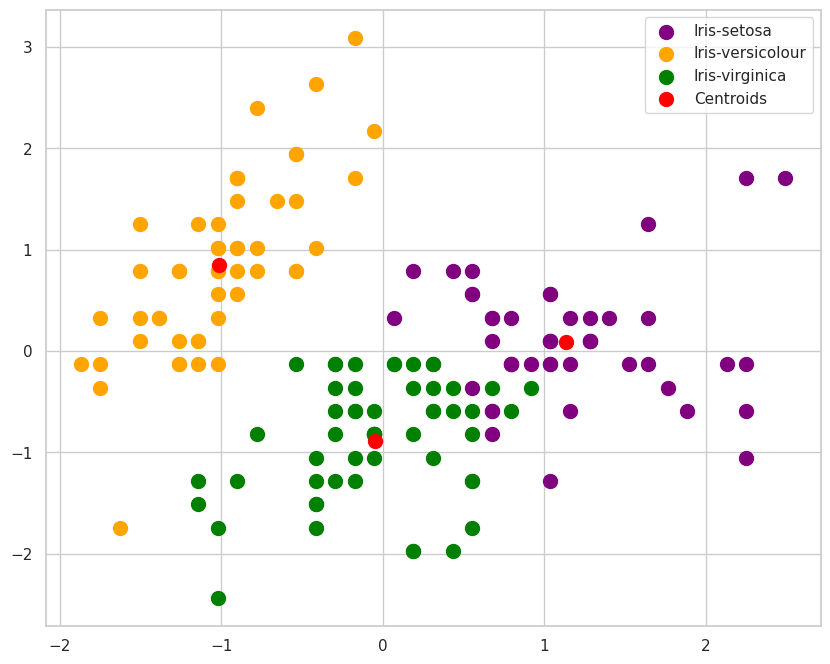

In [18]:
metrics_data = {
    'Metric': [
        'Sum of Squared Errors (SSE)',
        'Sum of Squares Between (SSB)',
        'Adjusted Rand Index (ARI)',
        'Adjusted Mutual Information (AMI)',
        'Normalized Mutual Information (NMI)',
        'Silhouette Score',
        'Calinski-Harabasz Score',
        'Davies-Bouldin Score'
    ],
    'Value': [
        calculate_sse(X_scaled, labels, centroids),
        calculate_ssb(X_scaled, labels, centroids),
        adjusted_rand_score(y, labels),
        adjusted_mutual_info_score(y, labels),
        normalized_mutual_info_score(y, labels),
        silhouette_score(X_scaled, labels),
        calinski_harabasz_score(X_scaled, labels),
        davies_bouldin_score(X_scaled, labels)
    ]
}

df_metrics = pd.DataFrame(metrics_data)

results['KMeans++'] = df_metrics

print("--- KMeans++ Evaluation Metrics ---")
print(df_metrics.to_string(index=False))
print("\n")

plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

# Cluster points
plt.scatter(X_scaled[labels == 0, 0], X_scaled[labels == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X_scaled[labels == 1, 0], X_scaled[labels == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X_scaled[labels == 2, 0], X_scaled[labels == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')


# Centroids of the clusters
plt.scatter(centroids[:, 0], centroids[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

Bisecting K-means

In [19]:
bkmeans = BisectingKMeans(n_clusters=n_clusters, n_init=10, random_state=42)
bkmeans.fit(X_scaled)

BisectingKMeans(n_clusters=3, n_init=10, random_state=42)

In [20]:
centroids = bkmeans.cluster_centers_
labels = bkmeans.labels_

--- Bisecting KMeans Evaluation Metrics ---
                             Metric      Value
        Sum of Squared Errors (SSE) 139.820496
       Sum of Squares Between (SSB) 460.179504
          Adjusted Rand Index (ARI)   0.620135
  Adjusted Mutual Information (AMI)   0.655223
Normalized Mutual Information (NMI)   0.659487
                   Silhouette Score   0.459948
            Calinski-Harabasz Score 241.904402
               Davies-Bouldin Score   0.833595




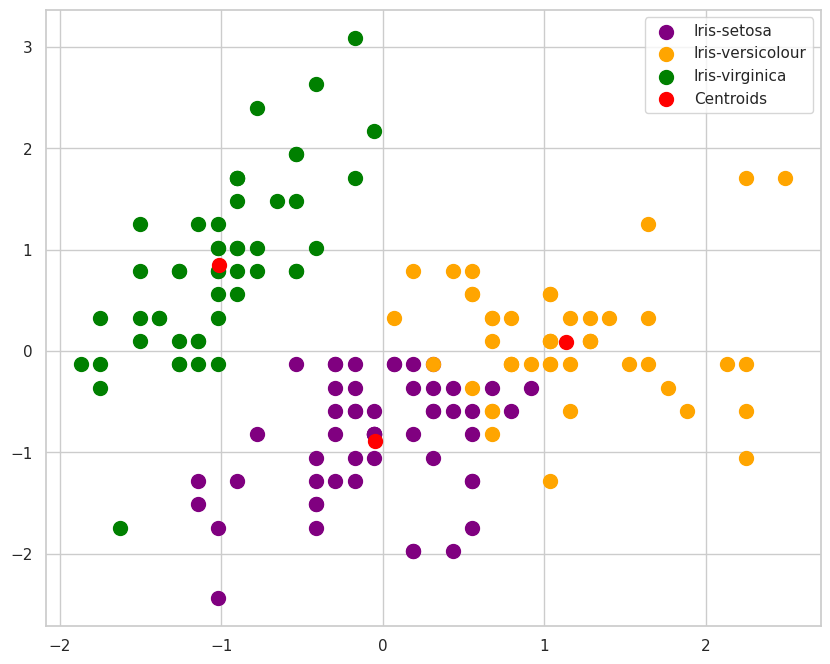

In [21]:
metrics_data = {
    'Metric': [
        'Sum of Squared Errors (SSE)',
        'Sum of Squares Between (SSB)',
        'Adjusted Rand Index (ARI)',
        'Adjusted Mutual Information (AMI)',
        'Normalized Mutual Information (NMI)',
        'Silhouette Score',
        'Calinski-Harabasz Score',
        'Davies-Bouldin Score'
    ],
    'Value': [
        calculate_sse(X_scaled, labels, centroids),
        calculate_ssb(X_scaled, labels, centroids),
        adjusted_rand_score(y, labels),
        adjusted_mutual_info_score(y, labels),
        normalized_mutual_info_score(y, labels),
        silhouette_score(X_scaled, labels),
        calinski_harabasz_score(X_scaled, labels),
        davies_bouldin_score(X_scaled, labels)
    ]
}

df_metrics = pd.DataFrame(metrics_data)

results['Bisecting KMeans'] = df_metrics

print("--- Bisecting KMeans Evaluation Metrics ---")
print(df_metrics.to_string(index=False))
print("\n")

plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

# Cluster points
plt.scatter(X_scaled[labels == 0, 0], X_scaled[labels == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X_scaled[labels == 1, 0], X_scaled[labels == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X_scaled[labels == 2, 0], X_scaled[labels == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')


# Centroids of the clusters
plt.scatter(centroids[:, 0], centroids[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [22]:
comparison_list = []

# Iterate through the results dictionary
for name, df_metric in results.items():
    processed_series = df_metric.set_index('Metric')['Value'].rename(name)
    comparison_list.append(processed_series)

comparison_df = pd.concat(comparison_list, axis=1)

print("--- Performance Comparison of Clustering Algorithms on Iris Dataset ---")
display(comparison_df.apply(pd.to_numeric, errors='coerce').round(4))

--- Performance Comparison of Clustering Algorithms on Iris Dataset ---


,KMeans,KMedoids,Dendogram,DBSCAN,OPTICS,KMeans++,Bisecting KMeans
Metric,,,,,,,
Sum of Squared Errors (SSE),139.8205,148.6104,1697.3047,190.1012,3.7885,139.8205,139.8205
Sum of Squares Between (SSB),460.1795,457.1982,504.1274,366.8775,129.7627,460.1795,460.1795
Adjusted Rand Index (ARI),0.6201,0.6312,0.6153,0.5518,0.0514,0.6201,0.6201
Adjusted Mutual Information (AMI),0.6552,0.6646,0.6713,0.6848,0.2657,0.6552,0.6552
Normalized Mutual Information (NMI),0.6595,0.6687,0.6755,0.6900,0.2924,0.6595,0.6595
Silhouette Score,0.4599,0.4590,0.4467,0.5217,-0.3009,0.4599,0.4599
Calinski-Harabasz Score,241.9044,239.7483,222.7192,126.2212,8.3282,241.9044,241.9044
Davies-Bouldin Score,0.8336,0.8385,0.8035,1.9432,2.4253,0.8336,0.8336


**WINE DATASET**

In [44]:
wine = load_wine()

df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target
df['target'] = df['target'].apply(lambda x: wine.target_names[x])

X = df.drop('target', axis=1)
y = df['target']

In [45]:
X_scaled = StandardScaler().fit_transform(X)
n_clusters = len(np.unique(y))

KMeans

In [25]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [26]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

--- KMeans Evaluation Metrics ---
                             Metric       Value
        Sum of Squared Errors (SSE) 1277.928489
       Sum of Squares Between (SSB) 1036.071511
          Adjusted Rand Index (ARI)    0.897495
  Adjusted Mutual Information (AMI)    0.874579
Normalized Mutual Information (NMI)    0.875894
                   Silhouette Score    0.284859
            Calinski-Harabasz Score   70.940008
               Davies-Bouldin Score    1.389188




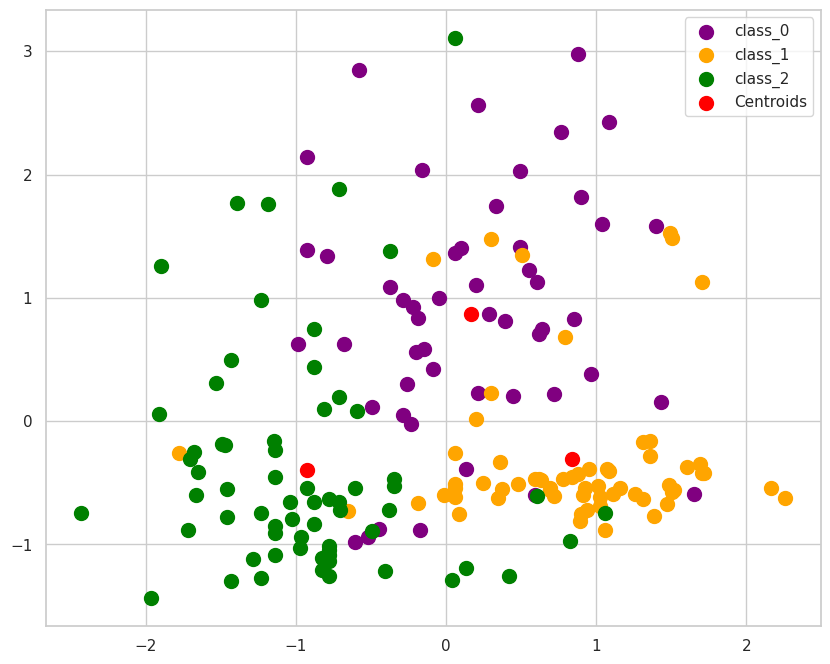

In [27]:
metrics_data = {
    'Metric': [
        'Sum of Squared Errors (SSE)',
        'Sum of Squares Between (SSB)',
        'Adjusted Rand Index (ARI)',
        'Adjusted Mutual Information (AMI)',
        'Normalized Mutual Information (NMI)',
        'Silhouette Score',
        'Calinski-Harabasz Score',
        'Davies-Bouldin Score'
    ],
    'Value': [
        calculate_sse(X_scaled, labels, centroids),
        calculate_ssb(X_scaled, labels, centroids),
        adjusted_rand_score(y, labels),
        adjusted_mutual_info_score(y, labels),
        normalized_mutual_info_score(y, labels),
        silhouette_score(X_scaled, labels),
        calinski_harabasz_score(X_scaled, labels),
        davies_bouldin_score(X_scaled, labels)
    ]
}

df_metrics = pd.DataFrame(metrics_data)

results['KMeans'] = df_metrics

print("--- KMeans Evaluation Metrics ---")
print(df_metrics.to_string(index=False))
print("\n")

plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

# Cluster points
plt.scatter(X_scaled[labels == 0, 0], X_scaled[labels == 0, 1], s = 100, c = 'purple', label = 'class_0')
plt.scatter(X_scaled[labels == 1, 0], X_scaled[labels == 1, 1], s = 100, c = 'orange', label = 'class_1')
plt.scatter(X_scaled[labels == 2, 0], X_scaled[labels == 2, 1], s = 100, c = 'green', label = 'class_2')


# Centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

KMedoids

In [28]:
kmedoid = KMedoids(n_clusters=n_clusters, random_state=42)
kmedoid.fit(X_scaled)

KMedoids(n_clusters=3, random_state=42)

In [29]:
centroids = kmedoid.cluster_centers_
labels = kmedoid.labels_

--- KMedoids Evaluation Metrics ---
                             Metric       Value
        Sum of Squared Errors (SSE) 1564.606349
       Sum of Squares Between (SSB) 1258.524095
          Adjusted Rand Index (ARI)    0.726341
  Adjusted Mutual Information (AMI)    0.753986
Normalized Mutual Information (NMI)    0.756574
                   Silhouette Score    0.265977
            Calinski-Harabasz Score   66.751966
               Davies-Bouldin Score    1.415990




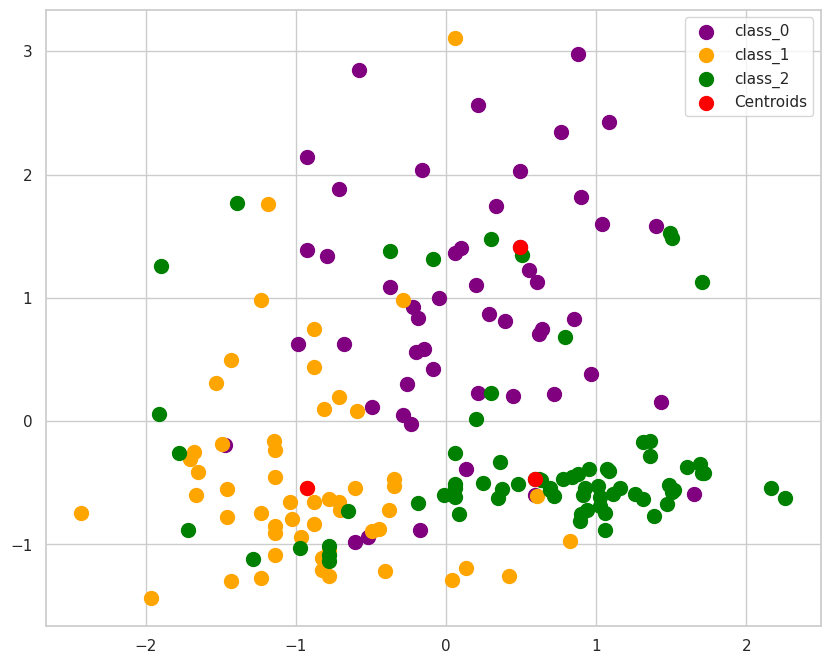

In [30]:
metrics_data = {
    'Metric': [
        'Sum of Squared Errors (SSE)',
        'Sum of Squares Between (SSB)',
        'Adjusted Rand Index (ARI)',
        'Adjusted Mutual Information (AMI)',
        'Normalized Mutual Information (NMI)',
        'Silhouette Score',
        'Calinski-Harabasz Score',
        'Davies-Bouldin Score'
    ],
    'Value': [
        calculate_sse(X_scaled, labels, centroids),
        calculate_ssb(X_scaled, labels, centroids),
        adjusted_rand_score(y, labels),
        adjusted_mutual_info_score(y, labels),
        normalized_mutual_info_score(y, labels),
        silhouette_score(X_scaled, labels),
        calinski_harabasz_score(X_scaled, labels),
        davies_bouldin_score(X_scaled, labels)
    ]
}

df_metrics = pd.DataFrame(metrics_data)

results['KMedoids'] = df_metrics

print("--- KMedoids Evaluation Metrics ---")
print(df_metrics.to_string(index=False))
print("\n")

plt.figure(figsize=(10, 8))
sns.set_theme(style="whitegrid")

# Cluster points
plt.scatter(X_scaled[labels == 0, 0], X_scaled[labels == 0, 1], s = 100, c = 'purple', label = 'class_0')
plt.scatter(X_scaled[labels == 1, 0], X_scaled[labels == 1, 1], s = 100, c = 'orange', label = 'class_1')
plt.scatter(X_scaled[labels == 2, 0], X_scaled[labels == 2, 1], s = 100, c = 'green', label = 'class_2')


# Centroids of the clusters
plt.scatter(centroids[:, 0], centroids[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

Dendogram

In [31]:
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg_cluster.fit_predict(X_scaled)

--- Dendogram Evaluation Metrics ---
                             Metric       Value
        Sum of Squared Errors (SSE) 3538.722556
       Sum of Squares Between (SSB) 1303.104448
          Adjusted Rand Index (ARI)    0.789933
  Adjusted Mutual Information (AMI)    0.784208
Normalized Mutual Information (NMI)    0.786465
                   Silhouette Score    0.277444
            Calinski-Harabasz Score   67.647468
               Davies-Bouldin Score    1.418592




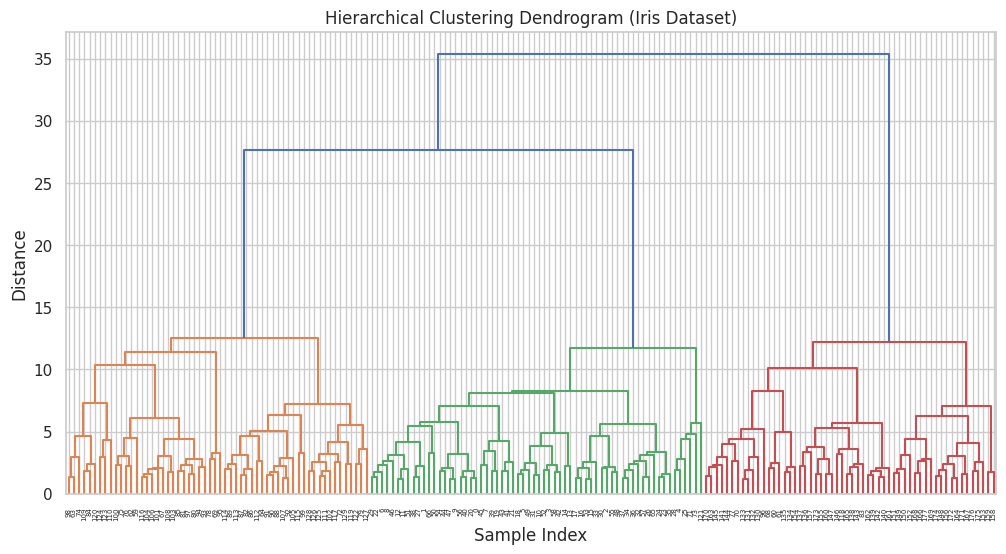

In [32]:
metrics_data = {
    'Metric': [
        'Sum of Squared Errors (SSE)',
        'Sum of Squares Between (SSB)',
        'Adjusted Rand Index (ARI)',
        'Adjusted Mutual Information (AMI)',
        'Normalized Mutual Information (NMI)',
        'Silhouette Score',
        'Calinski-Harabasz Score',
        'Davies-Bouldin Score'
    ],
    'Value': [
        calculate_sse(X_scaled, agg_labels, centroids),
        calculate_ssb(X_scaled, agg_labels, centroids),
        adjusted_rand_score(y, agg_labels),
        adjusted_mutual_info_score(y, agg_labels),
        normalized_mutual_info_score(y, agg_labels),
        silhouette_score(X_scaled, agg_labels),
        calinski_harabasz_score(X_scaled, agg_labels),
        davies_bouldin_score(X_scaled, agg_labels)
    ]
}

df_metrics = pd.DataFrame(metrics_data)

results['Dendogram'] = df_metrics

print("--- Dendogram Evaluation Metrics ---")
print(df_metrics.to_string(index=False))
print("\n")

plt.figure(figsize=(12, 6))
linked = linkage(X_scaled, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title(f'Hierarchical Clustering Dendrogram (Iris Dataset)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Density-based algorithms

In [47]:
density_params = {
        "DBSCAN": {'eps': 0.8 , 'min_samples': 5},
        "OPTICS": {'min_samples': 5}
    }

density_algs = {
    "DBSCAN": DBSCAN(**density_params["DBSCAN"]),
    "OPTICS": OPTICS(**density_params["OPTICS"])
}

metrics_list = [
    'Sum of Squared Errors (SSE)',
    'Sum of Squares Between (SSB)',
    'Adjusted Rand Index (ARI)',
    'Adjusted Mutual Information (AMI)',
    'Normalized Mutual Information (NMI)',
    'Silhouette Score',
    'Calinski-Harabasz Score',
    'Davies-Bouldin Score'
]


for name, alg in density_algs.items():
    print(f"--- Running {name} ---")
    labels = alg.fit_predict(X_scaled)
    unique_labels = set(labels)
    n_clusters_found = len(unique_labels) - (1 if -1 in unique_labels else 0)
    print(f"Found {n_clusters_found} clusters (excluding noise).")

    if n_clusters_found < 2:
        print(f"Skipping metrics calculation for {name} as less than 2 clusters were found.")
        na_values = ['N/A'] * len(metrics_list)
        df_metrics = pd.DataFrame({'Metric': metrics_list, 'Value': na_values})
        results[f'{name}'] = df_metrics 
        print(df_metrics.to_string(index=False))
        print("\n")
        continue

    centroids = get_centroids(X_scaled, labels) 
    metrics_data = {
        'Metric': metrics_list,
        'Value': [
            calculate_sse(X_scaled, labels, centroids),
            calculate_ssb(X_scaled, labels, centroids),
            adjusted_rand_score(y, labels),
            adjusted_mutual_info_score(y, labels),
            normalized_mutual_info_score(y, labels),
            silhouette_score(X_scaled, labels),
            calinski_harabasz_score(X_scaled, labels),
            davies_bouldin_score(X_scaled, labels)
        ]
    }

    df_metrics = pd.DataFrame(metrics_data)

    results[f'{name}'] = df_metrics 

    print(f"--- {name} Evaluation Metrics ---")
    print(df_metrics.to_string(index=False))
    print("\n")

--- Running DBSCAN ---
Found 0 clusters (excluding noise).
Skipping metrics calculation for DBSCAN as less than 2 clusters were found.
                             Metric Value
        Sum of Squared Errors (SSE)   N/A
       Sum of Squares Between (SSB)   N/A
          Adjusted Rand Index (ARI)   N/A
  Adjusted Mutual Information (AMI)   N/A
Normalized Mutual Information (NMI)   N/A
                   Silhouette Score   N/A
            Calinski-Harabasz Score   N/A
               Davies-Bouldin Score   N/A


--- Running OPTICS ---
Found 4 clusters (excluding noise).
--- OPTICS Evaluation Metrics ---
                             Metric      Value
        Sum of Squared Errors (SSE)  38.868103
       Sum of Squares Between (SSB) 225.896473
          Adjusted Rand Index (ARI)   0.035817
  Adjusted Mutual Information (AMI)   0.167991
Normalized Mutual Information (NMI)   0.194946
                   Silhouette Score  -0.133640
            Calinski-Harabasz Score   5.057149
               D

In [48]:
comparison_list = []

# Iterate through the results dictionary
for name, df_metric in results.items():
    processed_series = df_metric.set_index('Metric')['Value'].rename(name)
    comparison_list.append(processed_series)

comparison_df = pd.concat(comparison_list, axis=1)

print("--- Performance Comparison of Clustering Algorithms on Wine Dataset ---")
display(comparison_df.apply(pd.to_numeric, errors='coerce').round(4))

--- Performance Comparison of Clustering Algorithms on Wine Dataset ---


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,DBSCAN,OPTICS
Metric,,
Sum of Squared Errors (SSE),NaN,38.8681
Sum of Squares Between (SSB),NaN,225.8965
Adjusted Rand Index (ARI),NaN,0.0358
Adjusted Mutual Information (AMI),NaN,0.1680
Normalized Mutual Information (NMI),NaN,0.1949
Silhouette Score,NaN,-0.1336
Calinski-Harabasz Score,NaN,5.0571
Davies-Bouldin Score,NaN,1.6194
